In [144]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [145]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv("Resources/crypto_market_data.csv")
# Display sample data
df_market_data.head(10)

,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
5,binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
6,chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
7,cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
8,litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408
9,bitcoin-cash-sv,0.92530,3.29641,-1.86656,2.88926,-24.87434,7.42562,93.73082


In [146]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [147]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

---

### Prepare the Data

In [148]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(df_market_data.drop(columns=["coin_id"]))

scaled_df = pd.DataFrame(crypto_scaled, columns=df_market_data.columns[1:])
scaled_df['coin_id'] = df_market_data['coin_id']
scaled_df.set_index('coin_id', inplace=True)

In [149]:
# Create a DataFrame with the scaled data
crypto_scaled_df = pd.DataFrame(crypto_scaled, columns=df_market_data.columns[1:])


# Copy the crypto names from the original data
crypto_scaled_df['coin_id'] = df_market_data['coin_id']

# Set the coinid column as index
crypto_scaled_df.set_index('coin_id', inplace=True)

# Display sample data
print(crypto_scaled_df.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

---

### Find the Best Value for k Using the Original Data.

In [150]:
# Create a list with the number of k-values from 1 to 11
# Find the Best Value for k Using the Original Scaled DataFrame
k_values = list(range(1, 12))


In [151]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(crypto_scaled_df)
    inertia.append(kmeans.inertia_)
elbow_data = {"k": k_values, "inertia": inertia}
elbow_data

{'k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 'inertia': [286.99999999999994,
  198.57181809798126,
  145.63574772192862,
  79.02243535120975,
  66.21778006000336,
  59.139070025370074,
  48.406314490413614,
  38.99358798927969,
  34.40059545400235,
  28.57360256096785,
  23.89004435537795]}

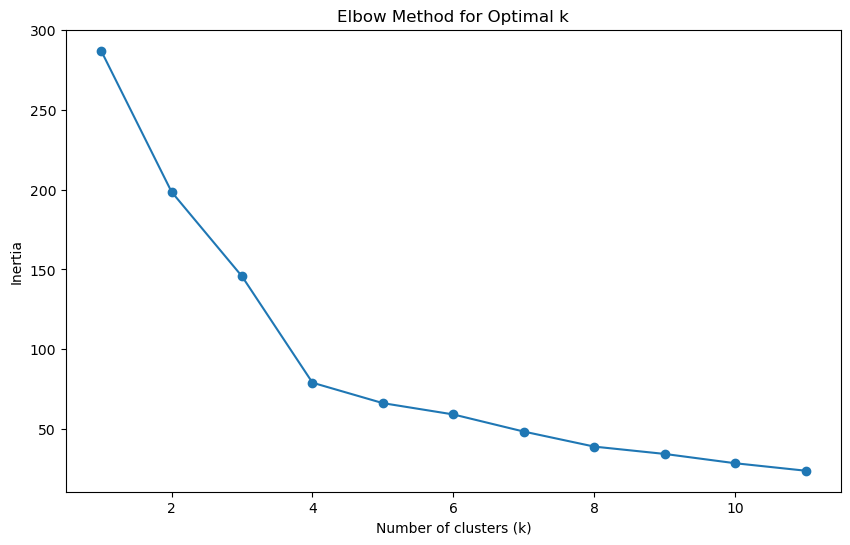

In [152]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_data["k"], elbow_data["inertia"], marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [153]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=0)

In [154]:
# Fit the K-Means model using the scaled data
kmeans.fit(crypto_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [155]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans.predict(crypto_scaled_df)

# Print the resulting array of cluster values.
clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [156]:
# Create a copy of the DataFrame
crypto_df_clustered = crypto_scaled_df.copy()


In [157]:
# Add a new column to the DataFrame with the predicted clusters
crypto_df_clustered['cluster'] = clusters

# Display sample data
crypto_df_clustered.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


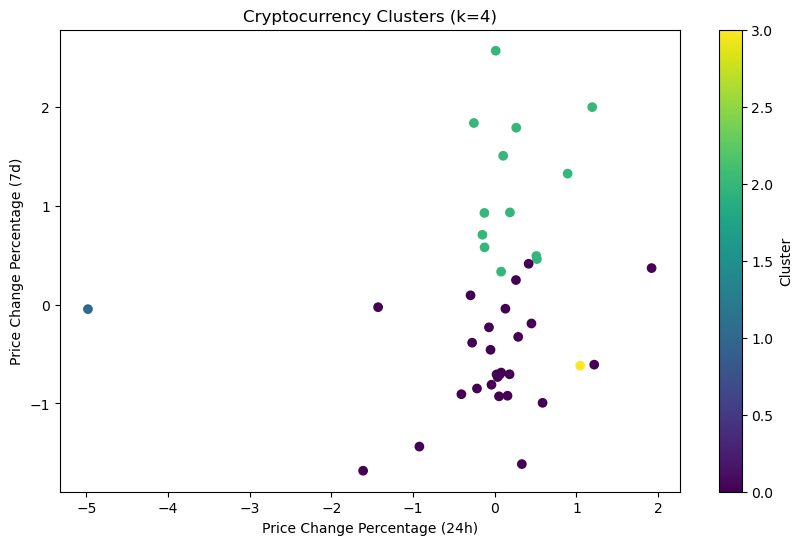

In [158]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    crypto_df_clustered['price_change_percentage_24h'], 
    crypto_df_clustered['price_change_percentage_7d'], 
    c=crypto_df_clustered['cluster'], 
    cmap='viridis'
)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Price Change Percentage (24h)')
plt.ylabel('Price Change Percentage (7d)')
plt.title('Cryptocurrency Clusters (k=4)')
plt.show()

---

### Optimize Clusters with Principal Component Analysis.

In [159]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [160]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
crypto_pca = pca.fit_transform(crypto_scaled_df)
# View the first five rows of the DataFrame. 
crypto_pca

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527],
       [-0.51653377,  1.38837748,  0.80407131],
       [-0.45071134,  0.51769912,  2.84614316],
       [-0.34559977,  0.72943939,  1.47801284],
       [-0.64946792,  0.43216514,  0.60030286],
       [-0.75901394, -0.20119979, -0.21765292],
       [-0.24819846, -1.37625159, -1.46202571],
       [-0.43840762, -0.17533654, -0.6633884 ],
       [-0.69342533, -0.47381462, -0.52759693],
       [ 0.06049915,  2.90940385,  1.49857131],
       [-0.39335243, -0.10819197, -0.01275608],
       [-0.79617564, -0.49440875,  1.08281169],
       [ 0.06407452, -1.26982514, -1.09882928],
       [-0.48901506, -0.73271912, -0.06254323],
       [-0.3062723 ,  0.70341515,  1.71422359],
       [-0.51352775, -0.14280239, -0.65656583],
       [-0.36212044, -0.98691441, -0.728

In [161]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance of the three principal components: {explained_variance}")
print(f"Total explained variance: {explained_variance.sum()}")

Explained variance of the three principal components: [0.3719856  0.34700813 0.17603793]
Total explained variance: 0.895031657030984


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is 0.8950 (or 89.50%).

In [162]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(crypto_pca, columns=['PC1', 'PC2', 'PC3'])
# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
pca_df['coin_id'] = crypto_scaled_df.index


# Set the coinid column as index
pca_df.set_index('coin_id', inplace=True)

# Display sample data
print(pca_df.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the PCA Data

In [163]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [164]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pca_df)
    inertia_values.append(kmeans.inertia_)

In [165]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data1 = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data1)

# Display the Elbow DataFrame
print(elbow_df)

     k     inertia
0    1  256.874086
1    2  168.811896
2    3  115.918077
3    4   49.665497
4    5   41.357314
5    6   30.796642
6    7   25.915457
7    8   21.890936
8    9   17.720699
9   10   13.838699
10  11    7.984355


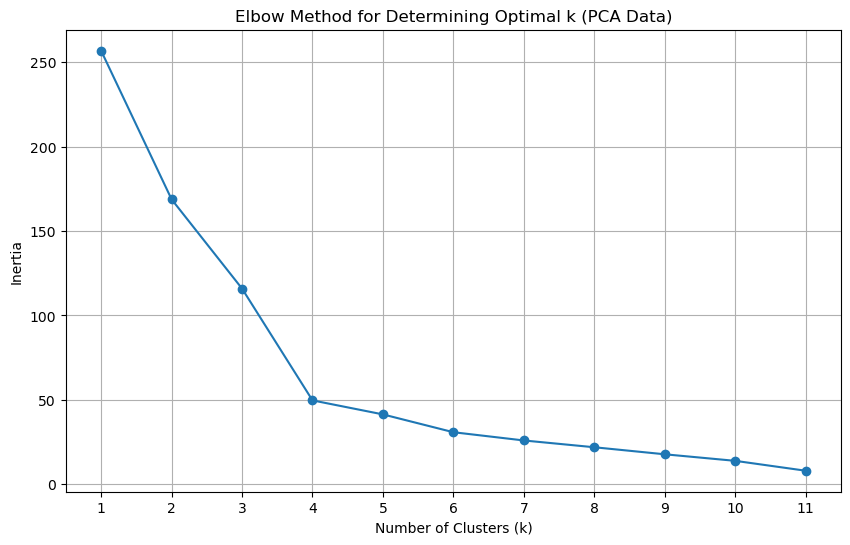

In [166]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Determining Optimal k (PCA Data)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [167]:
# Initialize the K-Means model using the best value for k
best_k = 4  # replace this with the value you determined from the elbow plot
kmeans = KMeans(n_clusters=best_k, random_state=0)

In [168]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df)

KMeans(n_clusters=4, random_state=0)

In [169]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_clusters = kmeans.predict(pca_df)
# Print the resulting array of cluster values.
pca_clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [170]:
# Create a copy of the DataFrame with the PCA data
pca_df_clustered = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_clustered['cluster'] = pca_clusters

# Display sample data
print(pca_df_clustered.head())

                   PC1       PC2       PC3  cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        2
ethereum     -0.458261  0.458466  0.952877        2
tether       -0.433070 -0.168126 -0.641752        0
ripple       -0.471835 -0.222660 -0.479053        0
bitcoin-cash -1.157800  2.041209  1.859715        2


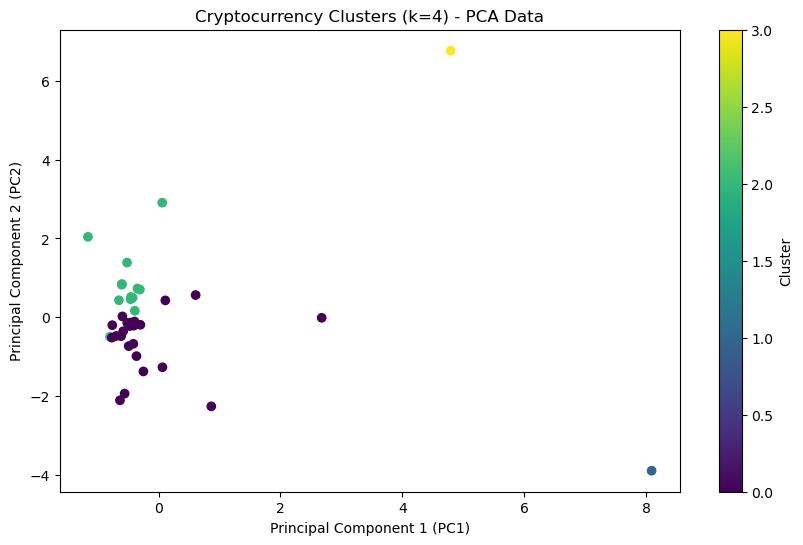

In [171]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    pca_df_clustered['PC1'], 
    pca_df_clustered['PC2'], 
    c=pca_df_clustered['cluster'], 
    cmap='viridis'
)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('Cryptocurrency Clusters (k=4) - PCA Data')
plt.show()

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [172]:
# Composite plot to contrast the Elbow curves
elbow_df_original = pd.DataFrame(elbow_data_original)
elbow_df_pca = pd.DataFrame(elbow_data_pca)

NameError: name 'elbow_data_original' is not defined

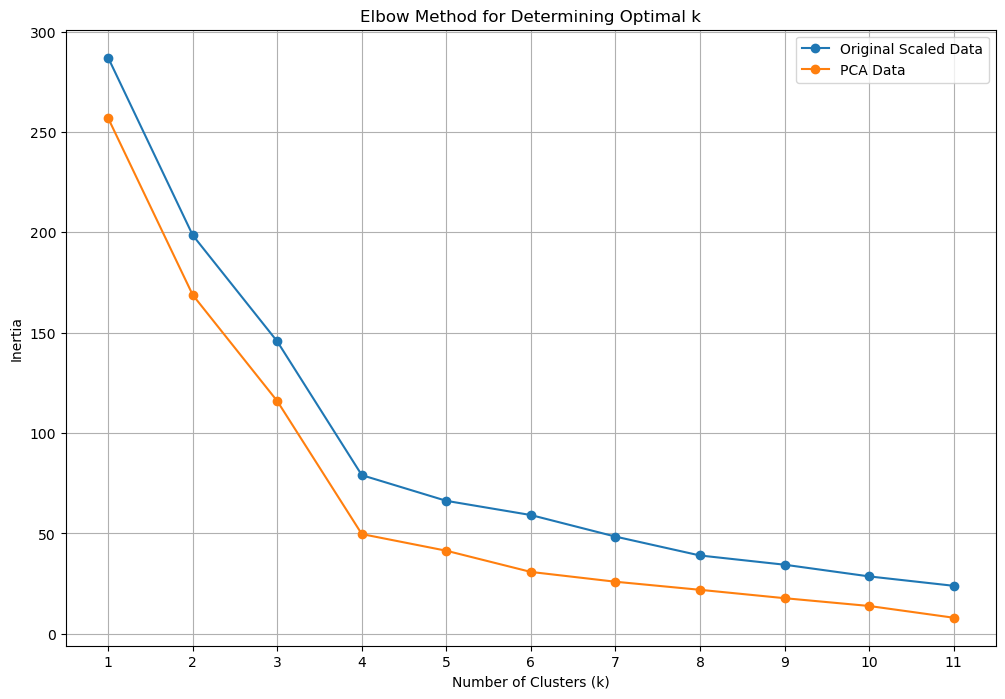

In [ ]:
# Composite plot to contrast the clusters
plt.figure(figsize=(12, 8))
plt.plot(elbow_data['k'], elbow_data['inertia'], marker='o', label='Original Scaled Data')
plt.plot(elbow_data1['k'], elbow_data1['inertia'], marker='o', label='PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Determining Optimal k')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** using fewer features through PCA generally leads to more efficient and interpretable clustering results, albeit with a potential loss of some detailed information present in the original data.